In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [8]:
df_dis = pd.read_csv('emdat_public_2023_09_21_query_uid-Mh0Ip8.csv')

df_gdp = pd.read_csv('GDP_growthRate_annual.csv')

gdp_actual = pd.read_csv('/Users/tino/Library/Mobile Documents/com~apple~CloudDocs/Oct 17, 2023/Applied Data Science Tutorial/actualGPD.csv')

print(df_dis.columns)
df_dis.dtypes
gdp_actual.dtypes


Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution (000 US$)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs (000 US$)',
       'Reconstruction Costs, Adjusted (000 US$)', 'Insured Damages (000 US$)',
       'Insured Damages, Adjusted (000 US$)', 'Total Damages (000 US$)',
       'Total Damages, Adjusted (000 US$)', 'CPI', 'Adm Level', 'Admin1 Code',
       'Admin2 Code', 'Geo Locations'],
      dtype='object')


Country Name     object
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
2022            float64
dtype: object

In [9]:
# Fill missing values for numerical columns with median
for column in df_dis.select_dtypes(include=['float64', 'int64']).columns:
    df_dis[column].fillna(df_dis[column].median(), inplace=True)

# Fill missing values for categorical columns with the most frequent value
for column in df_dis.select_dtypes(include=['object']).columns:
    df_dis[column].fillna(df_dis[column].mode()[0], inplace=True)

In [10]:
# Get the number of unique values for each categorical column
unique_counts = df_dis.select_dtypes(include=['object']).nunique()

# Display columns with their unique counts
print(unique_counts)

Dis No                 9756
Glide                  1224
Disaster Group            2
Disaster Subgroup         6
Disaster Type            14
Disaster Subtype         28
Disaster Subsubtype      10
Event Name              975
Country                 218
ISO                     218
Region                   22
Continent                 5
Location               8815
Origin                  683
Associated Dis           29
Associated Dis2          29
OFDA Response             1
Appeal                    2
Declaration               2
Dis Mag Scale             5
Local Time              385
River Basin            1105
Adm Level                 3
Admin1 Code            3795
Admin2 Code            3697
Geo Locations          6896
dtype: int64


In [11]:
for column in df_dis.select_dtypes(include=['object']).columns:
    if len(df_dis[column].unique()) < 10:
        df_dis = pd.get_dummies(df_dis, columns=[column], drop_first=True)

In [12]:
from sklearn.preprocessing import OneHotEncoder

# 1. Omit Non-Numerical Columns
X = df_dis.drop(columns=['Total Damages (000 US$)', 'Dis Mag'], axis=1)

# 2. Convert Categorical Columns to Numerical
# Identify columns with dtype 'object' which are likely categorical
cat_columns = X.select_dtypes(include=['object']).columns.tolist()

# Use one-hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)  # 'drop' parameter avoids multicollinearity issues
encoded_features = encoder.fit_transform(X[cat_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(cat_columns))

# Drop original categorical columns and concatenate the encoded features
X = X.drop(columns=cat_columns)
X = pd.concat([X, encoded_df], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalize Numerical Columns
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


KeyError: "['Dis Mag'] not found in axis"

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential()

# Input layer
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1))  # Linear activation for regression tasks

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # mean absolute error as a metric

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on Test Data: {mae}")
model.summary()


SymbolAlreadyExposedError: Symbol Zeros is already exposed as ().

In [ ]:
model.save('model.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.summary()
min_value = df_dis["Total Damages (000 US$)"].min()
max_value = df_dis["Total Damages (000 US$)"].max()

print(f"Minimum value of the target variable: {min_value}")
print(f"Maximum value of the target variable: {max_value}")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                1802752   
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1819393 (6.94 MB)
Trainable params: 1819

In [14]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Generate predictions from the trained model
y_pred = model.predict(X_test)

# Calculate the metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)



NameError: name 'model' is not defined

In [ ]:
import xgboost as xgb

# Convert the dataset into an optimized data structure called Dmatrix
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

# Instantiate the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 5, n_estimators = 100)

# Train the model
xgb_reg.fit(X_train, y_train)

# Predict
y_pred = xgb_reg.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 2511798925811.826
Root Mean Squared Error (RMSE): 1584865.5860393418


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Fit the scaler on the training data
scaler = MinMaxScaler().fit(X_train)

# Transform the training and test data
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)


In [ ]:
# Convert y_train and y_test to numpy arrays and reshape them
y_train_array = y_train.to_numpy().reshape(-1, 1)
y_test_array = y_test.to_numpy().reshape(-1, 1)

# Fit the scaler on the y_train data
y_scaler = MinMaxScaler().fit(y_train_array)

# Transform the y_train and y_test data
y_train_normalized = y_scaler.transform(y_train_array).ravel()
y_test_normalized = y_scaler.transform(y_test_array).ravel()


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_normalized.shape[1],)),
    layers.Dropout(0.1),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='linear')  # Linear activation for regression tasks
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train_normalized, 
                    y_train_normalized, epochs=100, batch_size=32, 
                    validation_data=(X_test_normalized, y_test_normalized))


Epoch 1/100
244/244 [==============================] - 11s 39ms/step - loss: 3.5861e-04 - val_loss: 3.8691e-05
Epoch 2/100
244/244 [==============================] - 8s 34ms/step - loss: 2.9578e-04 - val_loss: 3.4213e-05
Epoch 3/100
244/244 [==============================] - 6s 24ms/step - loss: 1.8540e-04 - val_loss: 3.6934e-05
Epoch 4/100
244/244 [==============================] - 7s 28ms/step - loss: 1.0460e-04 - val_loss: 3.5378e-05
Epoch 5/100
244/244 [==============================] - 7s 28ms/step - loss: 1.0674e-04 - val_loss: 3.7691e-05
Epoch 6/100
244/244 [==============================] - 7s 28ms/step - loss: 3.2883e-04 - val_loss: 4.3063e-05
Epoch 7/100
244/244 [==============================] - 9s 36ms/step - loss: 1.2237e-04 - val_loss: 3.6670e-05
Epoch 8/100
244/244 [==============================] - 7s 28ms/step - loss: 1.6353e-04 - val_loss: 4.0074e-05
Epoch 9/100
244/244 [==============================] - 6s 23ms/step - loss: 1.6521e-04 - val_loss: 4.3262e-05
Epoch 10/

In [ ]:
y_pred_normalized = model.predict(X_test_normalized)
y_pred = y_scaler.inverse_transform(y_pred_normalized).ravel()

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
model.summary()

61/61 [==============================] - 1s 7ms/step
Mean Squared Error (MSE): 1745729369377.9067
Root Mean Squared Error (RMSE): 1321260.5229014854
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               3605504   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               33024     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 1

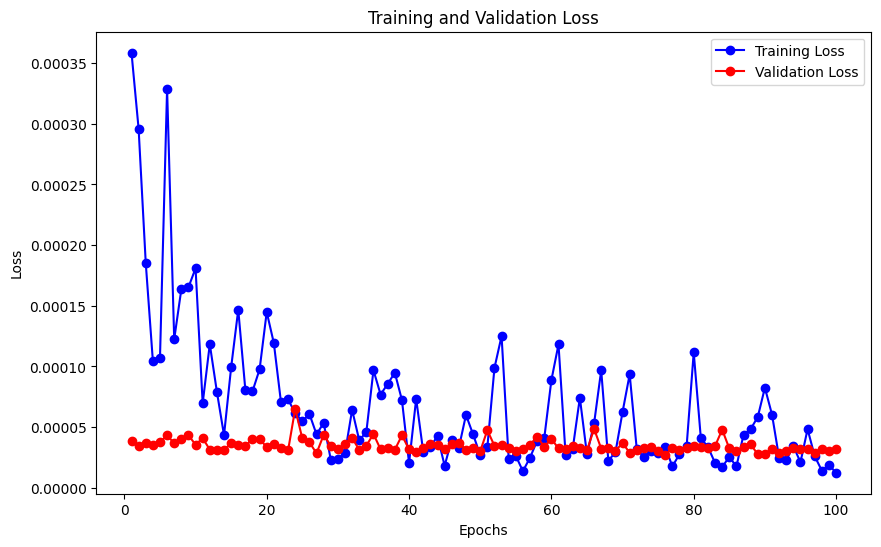

In [ ]:
import matplotlib.pyplot as plt

# Extracting the loss and validation loss from the training history
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Creating the plot for training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Feature Engineering

In [ ]:
# Filter dataframe to only numeric columns
df_dis_numeric = df_dis.select_dtypes(include=['number'])

# Now compute the correlation on the numeric dataframe
correlation_threshold = 0.05
correlations = df_dis_numeric.corr()['Total Damages (000 US$)']
features_to_drop = correlations[correlations.abs() < correlation_threshold].index
df_dis_numeric = df_dis_numeric.drop(columns=features_to_drop)


In [ ]:
# Example: Adding polynomial features for a specific column
df_dis_numeric['FeatureName_squared'] = df_dis_numeric['Total Damages (000 US$)'] ** 2


                                          AID Contribution (000 US$)  \
AID Contribution (000 US$)                                  1.000000   
Dis Mag Value                                              -0.011163   
Latitude                                                    0.071663   
Longitude                                                  -0.071952   
Start Year                                                  0.105067   
Start Month                                                -0.050126   
Start Day                                                   0.008057   
End Year                                                    0.107037   
End Month                                                  -0.040639   
End Day                                                    -0.046517   
Total Deaths                                                0.703286   
No Injured                                                  0.128386   
No Affected                                                 0.04

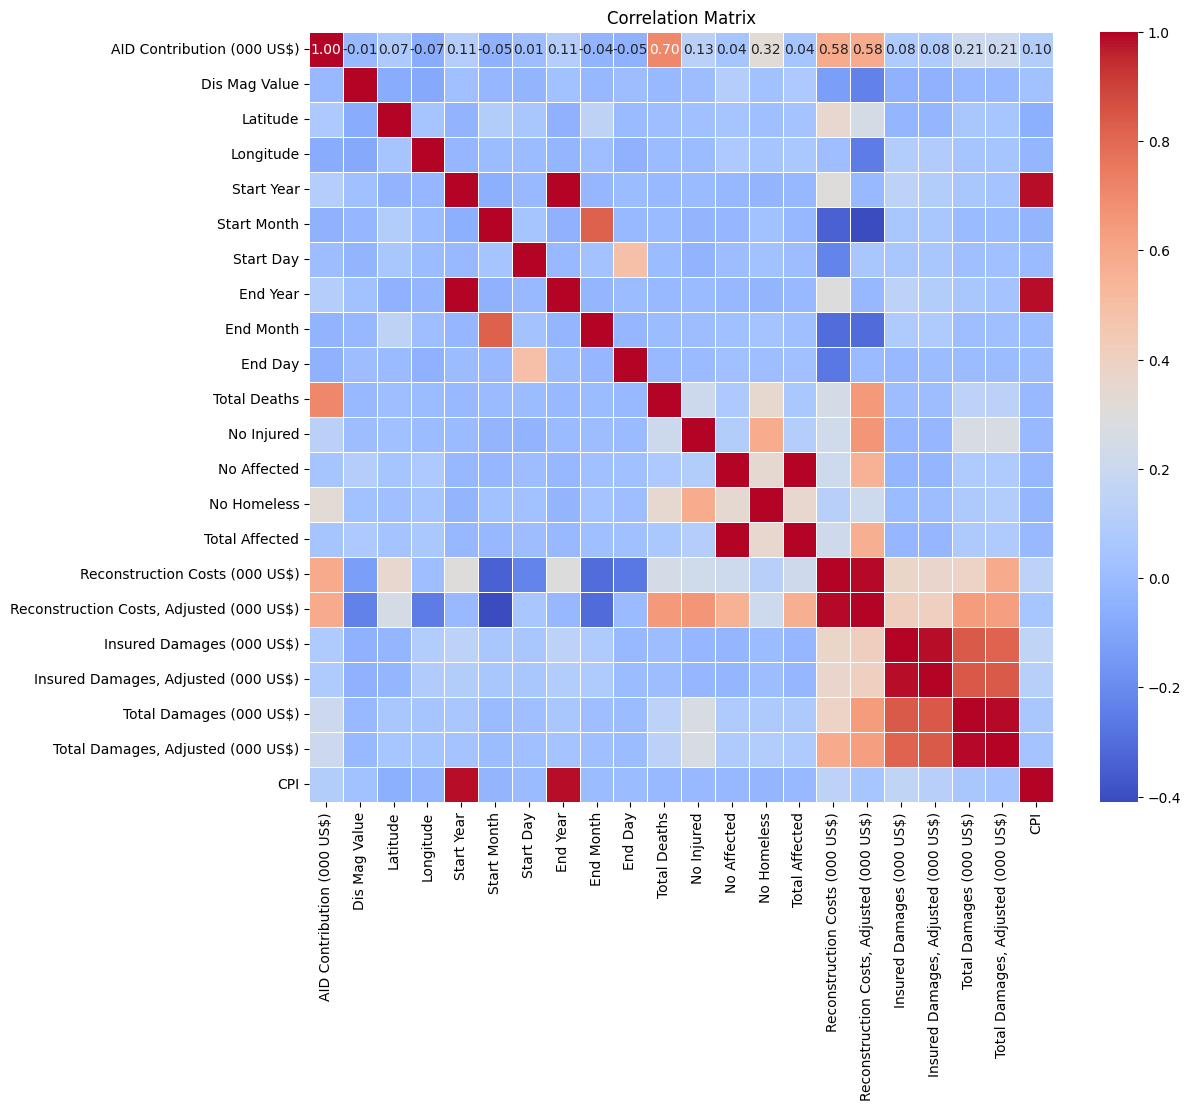

In [ ]:
# List down columns that should be excluded from correlation calculation (non-numeric columns)
non_numeric_columns = ['Adm Level','Dis Mag Scale','Dis No', 'Year', 'Seq', 
                       'Glide', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 
                       'Disaster Subsubtype', 'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location', 
                       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response', 'Appeal', 'Declaration', 
                       'Local Time', 'River Basin', 'Geo Locations', 'Admin2 Code', 'Admin1 Code']

# Exclude non-numeric columns from the DataFrame
numeric_data = df_dis.drop(columns=non_numeric_columns)
numeric_data.dtypes

# Generate the correlation matrix for numeric variables
correlation_matrix = numeric_data.corr()

# Print the correlation matrix
print(correlation_matrix)
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Customize the plot (optional)
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()

In [ ]:
# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Print the correlation matrix as a DataFrame
print(correlation_matrix)

# If you want to get the correlation matrix as a NumPy array, you can use the .values attribute
correlation_matrix_numpy = correlation_matrix.values
print(correlation_matrix_numpy)


                                          AID Contribution (000 US$)  \
AID Contribution (000 US$)                                  1.000000   
Dis Mag Value                                              -0.011163   
Latitude                                                    0.071663   
Longitude                                                  -0.071952   
Start Year                                                  0.105067   
Start Month                                                -0.050126   
Start Day                                                   0.008057   
End Year                                                    0.107037   
End Month                                                  -0.040639   
End Day                                                    -0.046517   
Total Deaths                                                0.703286   
No Injured                                                  0.128386   
No Affected                                                 0.04

In [ ]:
from sklearn.impute import SimpleImputer

X = numeric_data[['Total Deaths', 'Reconstruction Costs (000 US$)', 'Insured Damages (000 US$)', 'Total Affected', 'No Injured', 'No Affected']]
y = numeric_data['CPI']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer with a strategy (e.g., mean, median, or most frequent)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
# Impute missing values in X
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))


In [ ]:
# Drop rows with NaN values
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train.index]  # Update y_train accordingly

X_test_clean = X_test.dropna()
y_test_clean = y_test[X_test.index]  # Update y_test accordingly



In [ ]:
# Check for NaN values in X_train
nan_indices = np.argwhere(np.isnan(X_train))

# Print the indices of NaN values in X_train
print("Indices of NaN values in X_train:", nan_indices)

Indices of NaN values in X_train: [[   0    1]
 [   0    2]
 [   0    3]
 ...
 [7803    1]
 [7803    2]
 [7803    4]]


In [ ]:
# Check for NaN values in X_train_imputed
nan_indices_imputed_train = np.argwhere(np.isnan(X_train_imputed))

# Check for NaN values in X_test_imputed
nan_indices_imputed_test = np.argwhere(np.isnan(X_test_imputed))

# Print the indices of NaN values in X_train_imputed
print("Indices of NaN values in X_train_imputed:", nan_indices_imputed_train)

# Print the indices of NaN values in X_test_imputed
print("Indices of NaN values in X_test_imputed:", nan_indices_imputed_test)


Indices of NaN values in X_train_imputed: []
Indices of NaN values in X_test_imputed: []


In [ ]:
# Check for NaN values in X_imputed
nan_indices_imputed = np.argwhere(np.isnan(X_imputed))

# Print the indices of NaN values in X_imputed
print("Indices of NaN values in X_imputed:", nan_indices_imputed)


Indices of NaN values in X_imputed: []


In [ ]:
# Extract the encoder part from the trained autoencoder
encoder_model = Model(input_layer, encoded)

# Obtain the encoded features for training and test data
encoded_train_features = encoder_model.predict(X_train_clean)
encoded_test_features = encoder_model.predict(X_test_clean)


61/61 [==============================] - 0s 727us/step


In [ ]:
# Initialize the regression model
regression_model = LinearRegression()

# Train the regression model using the encoded features
regression_model.fit(encoded_train_features, y_train_clean)

# Make predictions on the encoded test features
predictions = regression_model.predict(encoded_test_features)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_clean, predictions)
#calculate r-squared
rsq = r2_score(y_test_clean, predictions)
print("Mean Squared Error:", mse)
print("R-Squared:", rsq)
model.summary()

Mean Squared Error: 116.42715546592243
R-Squared: -0.005798767584264786
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2561 (10.00 KB)
Trainable params: 2561 (10.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)
num_features = len(numeric_data[['Total Deaths', 'Reconstruction Costs (000 US$)', 'Insured Damages (000 US$)', 'Total Affected']])  # Replace feature_vocabulary with your actual feature vocabulary
print(num_features)
print("Unique feature values:", np.unique(X_train_clean))


9756
Unique feature values: [1.00000e+00 2.00000e+00 3.00000e+00 ... 1.50000e+08 1.50146e+08
 3.30000e+08]


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Dropout, Bidirectional, TimeDistributed
# Define the number of features in your dataset
num_features = 330000001 

# Define input shape for features
input_features = Input(shape=(num_features,))

embedding_dim = 128 
lstm_units = 64

In [25]:
gdp_2019 = gdp_actual['2019']
gdp_2019 = gdp_2019.dropna()
total_damages2019 = df_dis.loc[df_dis['End Year'] == 2019, 'Total Damages (000 US$)']
total_damages2019 = total_damages2019.reset_index(drop=True)
total_damages2019 = total_damages2019.dropna()


In [29]:
print(len(gdp_2019), len(total_damages2019))

merged_data = pd.merge(df_gdp, df_dis, left_on='Country Name', right_on='Country', how='inner')

merged_data = merged_data.dropna()
merged_data_aff = merged_data.loc[merged_data['End Year'] == 2019, 'Total Damages (000 US$)']
merged_data_aff.head()

257 436


216    100000.0
217    100000.0
245    100000.0
246     45000.0
247    700000.0
Name: Total Damages (000 US$), dtype: float64

In [30]:
# Assuming you have merged the data as mentioned before
merged_data = pd.merge(gdp_actual, df_dis, left_on='Country Name', right_on='Country', how='inner')

# Filter rows where 'End Year' is 2019 and 'Total Affected' is not null
filtered_data = merged_data[(merged_data['End Year'] == 2019) & (~merged_data['Total Damages (000 US$)'].isnull())]

# Select relevant columns if needed
selected_columns = ['Country Name', '2019', 'Total Damages (000 US$)']  # Specify the columns you want to keep
filtered_data = filtered_data[selected_columns]

# Reset index if you want a new continuous index for the filtered dataset
filtered_data.reset_index(drop=True, inplace=True)

# Print the first few rows of the filtered dataset
print(filtered_data.head())

  Country Name          2019  Total Damages (000 US$)
0  Afghanistan  1.890450e+10                 100000.0
1  Afghanistan  1.890450e+10                 100000.0
2  Afghanistan  1.890450e+10                 100000.0
3  Afghanistan  1.890450e+10                 100000.0
4  Afghanistan  1.890450e+10                 100000.0


In [31]:
print(len(filtered_data['Country Name']), len(filtered_data['2019']), len(filtered_data['Total Damages (000 US$)']))

325 325 325


In [32]:
# Group by 'Country Name' and '2019', then sum 'Total Affected'
merged_data_grouped = filtered_data.groupby(['Country Name', '2019'], as_index=False)['Total Damages (000 US$)'].sum()

# Print the first few rows of the merged and grouped data
print(merged_data_grouped.head())
print(len(merged_data_grouped['Country Name']), len(merged_data_grouped['2019']), len(merged_data_grouped['Total Damages (000 US$)']))

  Country Name          2019  Total Damages (000 US$)
0  Afghanistan  1.890450e+10                 800000.0
1      Albania  1.540183e+10                 845000.0
2      Algeria  1.717603e+11                 100000.0
3       Angola  6.930911e+10                 200000.0
4    Argentina  4.477547e+11                 300000.0
95 95 95


In [33]:
# add column for gdp as percentage of total damages
merged_data_grouped = merged_data_grouped.assign(gdp_percent = lambda x: x['2019'] / x['Total Damages (000 US$)'])
merged_data_grouped.head()

,Country Name,2019,Total Damages (000 US$),gdp_percent
0,Afghanistan,1.890450e+10,800000.0,2.363063e+04
1,Albania,1.540183e+10,845000.0,1.822701e+04
2,Algeria,1.717603e+11,100000.0,1.717603e+06
3,Angola,6.930911e+10,200000.0,3.465456e+05
4,Argentina,4.477547e+11,300000.0,1.492516e+06


In [102]:
import pandas as pd
import numpy as np

class GDPDamageCalculator:
    def __init__(self, gdp_actual, df_dis):
        self.gdp_actual = gdp_actual
        self.df_dis = df_dis

    def fill_missing_with_median(self, dataframe, column_name):
        median_value = dataframe[column_name].median()
        dataframe[column_name].fillna(median_value, inplace=True)

    def merge_and_calculate(self):
        final_results = pd.DataFrame(columns=['Country Name', 'Year', 'GDP', 'Total Damages (000 US$)', 'Damage as % of GDP'])

        for year in range(2000, 2023):
            # Fill missing GDP values with the median for the year
            self.fill_missing_with_median(self.gdp_actual, str(year))

            gdp_year = self.gdp_actual[['Country Name', str(year)]]
            total_damages_year = self.df_dis.loc[self.df_dis['End Year'] == year, ['Country', 'Total Damages (000 US$)']]

            # Fill missing Total Damages values with the median
            self.fill_missing_with_median(total_damages_year, 'Total Damages (000 US$)')

            merged_data = pd.merge(gdp_year, total_damages_year, left_on='Country Name', right_on='Country', how='inner')
            merged_data = merged_data.groupby(['Country Name', str(year)]).agg({'Total Damages (000 US$)': 'sum'}).reset_index()

            # Calculate damages as percentage of GDP
            merged_data['Damage as % of GDP'] = (merged_data['Total Damages (000 US$)'] * 1000 / merged_data[str(year)]) *100
            merged_data = merged_data.rename(columns={str(year): 'GDP'})
            merged_data['Year'] = year

            # Append the results for this year to the final results DataFrame
            final_results = pd.concat([final_results, merged_data[['Country Name', 'Year', 'GDP', 'Total Damages (000 US$)', 'Damage as % of GDP']]], ignore_index=True)

        # Remove rows where percentage is infinite or NaN
        final_results.replace([float('inf'), float('-inf')], np.nan, inplace=True)
        final_results.dropna(inplace=True)

        return final_results

# Initialize the calculator with your data
calculator = GDPDamageCalculator(gdp_actual, df_dis)

# Calculate the results
result_df = calculator.merge_and_calculate()

# Print the result to see its structure
print(result_df.head())

# Save the DataFrame to a CSV file
result_df.to_csv('gdp_damage_percentage.csv', index=False)


/var/folders/0w/6yxct2r128j0fyk495rm42q80000gn/T/ipykernel_52655/2253563417.py:35: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



  Country Name  Year           GDP  Total Damages (000 US$)  \
0  Afghanistan  2000  1.657753e+10                 400000.0   
1      Algeria  2000  5.479040e+10                 500000.0   
2       Angola  2000  9.129595e+09                 510000.0   
3    Argentina  2000  2.842038e+11                1000000.0   
4      Armenia  2000  1.911564e+09                 100000.0   

   Damage as % of GDP  
0            2.412904  
1            0.912569  
2            5.586228  
3            0.351860  
4            5.231319  


In [104]:
gdp_damage_percentage = pd.read_csv('gdp_damage_percentage.csv')
gdp_damage_percentage

,Country Name,Year,GDP,Total Damages (000 US$),Damage as % of GDP
0,Afghanistan,2000,1.657753e+10,400000.0,2.412904
1,Algeria,2000,5.479040e+10,500000.0,0.912569
2,Angola,2000,9.129595e+09,510000.0,5.586228
3,Argentina,2000,2.842038e+11,1000000.0,0.351860
4,Armenia,2000,1.911564e+09,100000.0,5.231319
...,...,...,...,...,...
2191,Uruguay,2022,7.117715e+10,100000.0,0.140495
2192,Uzbekistan,2022,8.039185e+10,100000.0,0.124391
2193,Viet Nam,2022,4.088024e+11,666500.0,0.163037
2194,Zambia,2022,2.978445e+10,200000.0,0.671491


In [105]:
# Aggregate the data: Calculate the average 'Damage as % of GDP' for each country across all years
country_damage_avg = gdp_damage_percentage.groupby('Country Name')['Damage as % of GDP'].mean()

# Sort the results and get the top 10 countries
top_10_countries = country_damage_avg.sort_values(ascending=False).head(10)

print(top_10_countries)


Country Name
Tuvalu                       221.536370
Sint Maarten (Dutch part)    209.798406
Dominica                      84.078561
Kiribati                      61.947752
Grenada                       59.953845
Sao Tome and Principe         46.137185
Palau                         41.519696
Vanuatu                       40.123981
Tonga                         23.569193
Burundi                       20.875957
Name: Damage as % of GDP, dtype: float64


In [106]:
# Aggregate the data: Calculate the average 'Damage as % of GDP' for each country across all years
country_damage_avg_all = gdp_damage_percentage.groupby('Country Name')['Damage as % of GDP'].mean().reset_index()

# Rename the column for clarity
country_damage_avg_all.rename(columns={'Damage as % of GDP': 'Average Damage as % of GDP'}, inplace=True)

country_damage_avg_all

country_damage_avg_all.to_csv('gdp_damage_average.csv', index=False)

/var/folders/0w/6yxct2r128j0fyk495rm42q80000gn/T/ipykernel_52655/2476624877.py:9: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



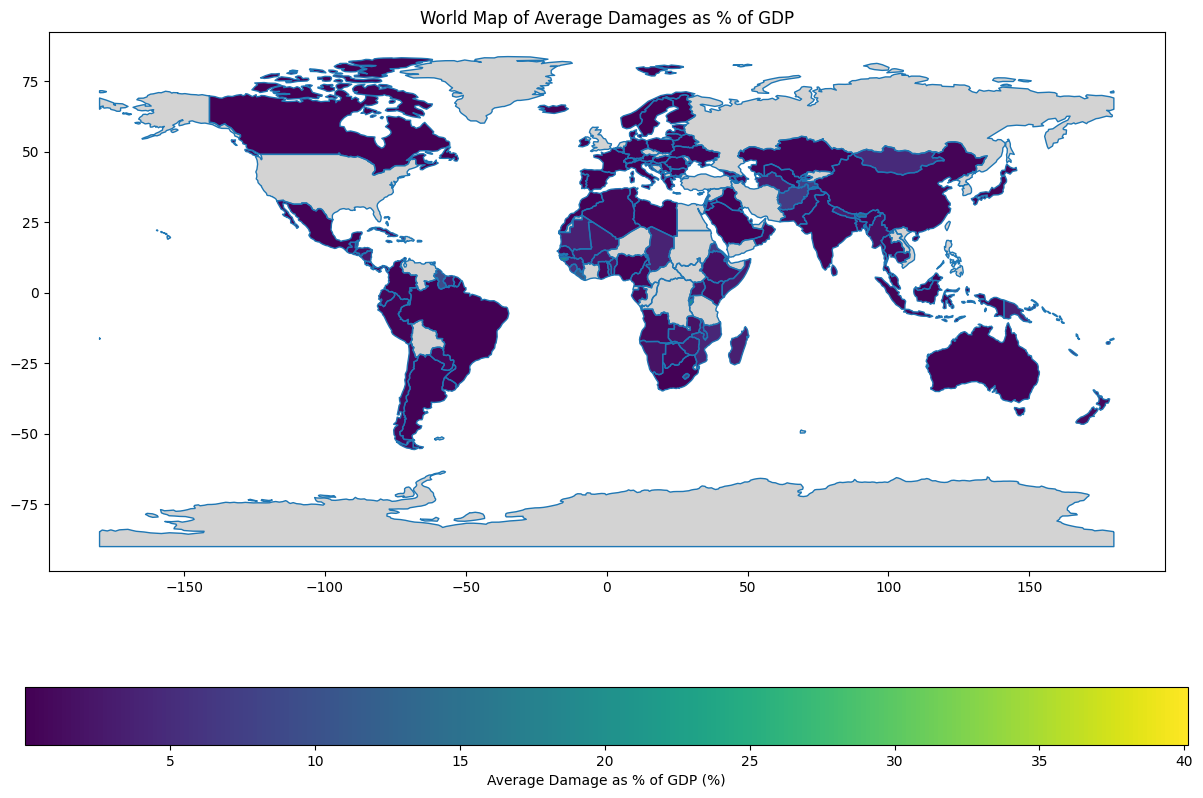

In [107]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the average damage data
damage_data = pd.read_csv('gdp_damage_average.csv')

# Load world geometries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the damage data with the world geometries
world = world.merge(damage_data, how='left', left_on='name', right_on='Country Name')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='Average Damage as % of GDP', ax=ax, legend=True, cmap='viridis',  # Changed color map to 'viridis'
           legend_kwds={'label': "Average Damage as % of GDP (%)", 'orientation': "horizontal"},
           missing_kwds={'color': 'lightgrey', 'label': 'Missing Data'})

plt.title('World Map of Average Damages as % of GDP')
plt.show()
plt.show()


In [108]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('gdp_damage_percentage.csv')


In [148]:
# Group and aggregate the data by 'Country Name' and 'Year'
df_agg = df.groupby(['Country Name', 'Year'])['Damage as % of GDP'].max().reset_index()
df_agg.to_csv('aggregated_data.csv', index=False)

# Create the interactive map with a slider for year selection
fig = px.choropleth(df_agg,
                    locations="Country Name",
                    locationmode='country names',  # Specify the mode as country names
                    color="Damage as % of GDP",
                    hover_name="Country Name",
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.YlOrRd,
                    range_color=[0, 30])

fig.update_layout(title_text='World Map of Damages as % of GDP Over Time',
                  geo=dict(showcoastlines=True, projection_type='equirectangular'))

# Show the figure
fig.show()


In [136]:
print(df_agg)

     Country Name  Year  Damage as % of GDP
0     Afghanistan  2000            2.412904
1     Afghanistan  2001            3.174716
2     Afghanistan  2002           38.919524
3     Afghanistan  2003           22.028874
4     Afghanistan  2004            5.746218
...           ...   ...                 ...
2191     Zimbabwe  2018            0.292774
2192     Zimbabwe  2019            0.916077
2193     Zimbabwe  2020            0.464907
2194     Zimbabwe  2021            0.352470
2195     Zimbabwe  2022            1.934418

[2196 rows x 3 columns]


In [122]:
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls

# You'll need to provide your Chart Studio username and API key
chart_studio.tools.set_credentials_file(username='tino_minerva', api_key='echhpPEM3baKGr4P710K')

# Save the figure to Chart Studio
url = py.plot(fig, filename='World Map of Damages as % of GDP Over Time', auto_open=True)


In [141]:
country_damage_avg_all

,Country Name,Average Damage as % of GDP
0,Afghanistan,6.913403
1,Albania,1.829991
2,Algeria,0.635294
3,American Samoa,18.456587
4,Angola,0.957512
...,...,...
154,Uzbekistan,0.289627
155,Vanuatu,40.123981
156,Viet Nam,0.953497
157,Zambia,1.986018


In [143]:
fig = px.scatter(country_damage_avg_all, x='Country Name', y='Average Damage as % of GDP',
                 title='Damage as % of GDP over Time')

# Show the figure
fig.show()